body	STRING	NULLABLE	

score_hidden	BOOLEAN	NULLABLE	

archived	BOOLEAN	NULLABLE	

name	STRING	NULLABLE	

author	STRING	NULLABLE	

author_flair_text	STRING	NULLABLE	

downs	INTEGER	NULLABLE	

created_utc	INTEGER	NULLABLE	

subreddit_id	STRING	NULLABLE	

link_id	STRING	NULLABLE	

parent_id	STRING	NULLABLE	

score	INTEGER	NULLABLE	

retrieved_on	INTEGER	NULLABLE	

controversiality	INTEGER	NULLABLE	

gilded	INTEGER	NULLABLE	

id	STRING	NULLABLE	

subreddit	STRING	NULLABLE	

ups	INTEGER	NULLABLE	

distinguished	STRING	NULLABLE	

author_flair_css_class	STRING	NULLABLE	

removal_reason	STRING	NULLABLE	

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [195]:
query = """
SELECT link_id, parent_id, id, subreddit, body, score
 FROM [fh-bigquery:reddit_comments.all] 
 WHERE author NOT IN (SELECT author FROM [fh-bigquery:reddit_comments.bots_201505])
     AND subreddit = 'MachineLearning'
 LIMIT 1000
"""
raw_sample_data = pd.read_gbq(query, project_id="fourth-reddit-project")

Requesting query... ok.
Query running...
Query done.
Processed: 614.9 Gb

Retrieving results...
Got 1000 rows.

Total time taken 6.34 s.
Finished at 2017-02-10 16:23:03.


In [196]:
sample_data = raw_sample_data.copy()
sample_data["body length"] = sample_data["body"].apply(lambda x: len(x))
sample_data["comments in thread"] = sample_data["link_id"].map(sample_data.groupby("link_id")["id"].count().to_dict())
sample_data["score normalized by comment count"] = sample_data["score"] / sample_data["comments in thread"]
sample_data.head()

,link_id,parent_id,id,subreddit,body,score,body length,comments in thread,score normalized by comment count
0,t3_5famzx,t1_dajdmdi,dakaiqj,MachineLearning,I would like /u/benanne to answer this please,1,45,28,0.035714
1,t3_5edfuh,t3_5edfuh,dachgme,MachineLearning,Can't find a Kindle version. Hope one's relea...,1,55,18,0.055556
2,t3_5eubmz,t3_5eubmz,dai1h0y,MachineLearning,Nice. I finally understand what Nelder Mead is...,1,102,3,0.333333
3,t3_5b5022,t1_d9ly9jj,d9m25pn,MachineLearning,I think there is no need to. It is generated. ...,3,260,7,0.428571
4,t3_5f03uo,t1_dagtnxs,dagxnl7,MachineLearning,"To my knowledge, all Musk has done is standard...",4,386,40,0.100000


In [197]:
sample_data.describe()

,score,body length,comments in thread,score normalized by comment count
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.187000,318.217000,10.822000,0.798792
std,10.281622,429.875308,10.965243,1.353863
min,-11.000000,1.000000,1.000000,-3.000000
25%,1.000000,79.750000,3.000000,0.133333
50%,2.000000,178.500000,7.000000,0.333333
75%,4.000000,376.250000,14.000000,1.000000
max,235.000000,4416.000000,40.000000,16.785714


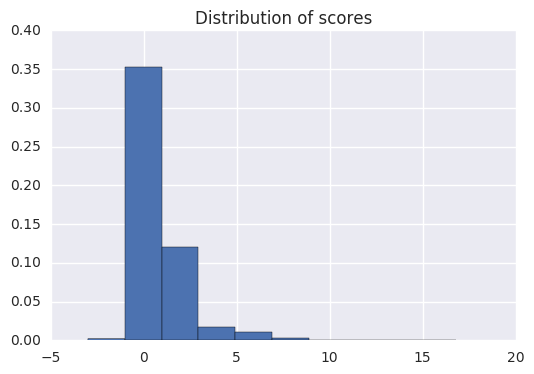

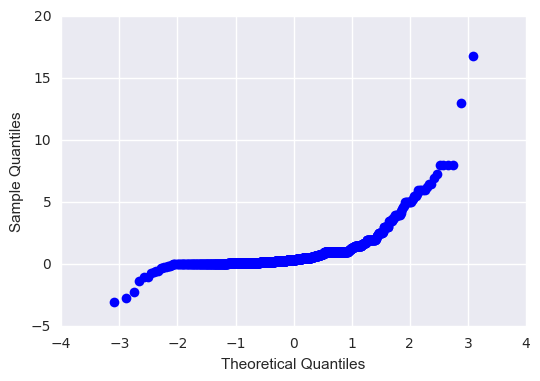

In [199]:
sample_data["score normalized by comment count"].hist(normed = True)
plt.title("Distribution of scores")
plt.show()

qqplot(sample_data["score normalized by comment count"])
plt.show()

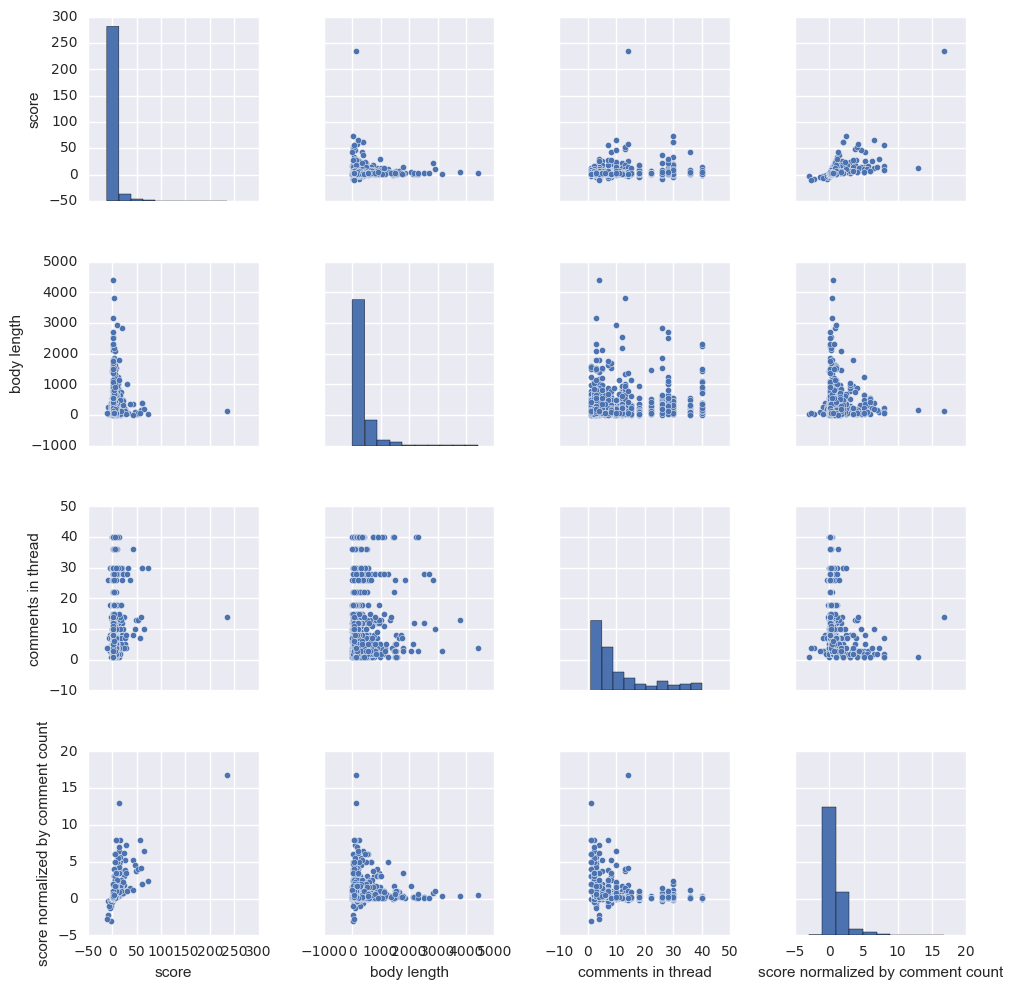

In [200]:
sns.pairplot(sample_data)
plt.show()

In [188]:
# sample_data.to_csv("/Users/Nathan/Desktop/PuzzleAndDragons_subreddit_sample.csv")

In [ ]:
"""SELECT link_id, parent_id, id, subreddit, body, score
 FROM [fh-bigquery:reddit_comments.all] 
 WHERE author NOT IN (SELECT author FROM [fh-bigquery:reddit_comments.bots_201505])
     AND subreddit = 'MachineLearning'
 LIMIT 1000"""